In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/hakanormanci/statistical-thinking-1/main/euroleague.csv'

In [5]:
df = pd.read_csv(url)

In [6]:
df.head()

,HT,AT,TYPE,HTPTS,HTTWOFG,HTTWOFGTOTAL,HTTHREEFG,HTTHREEFGTOTAL,HTFT,HTFTTOTAL,...,HTTQCUM,HTFQCUM2,HTFOUM,HTSOCUM,ATFQCUM,ATSCCUM,ATTQCUM,ATFQCUM2,ATFOCUM,ATSOCUM
0,Lugano Snakes,Zadar,FT,75,25,47,6,16,7,13,...,54,75,NaN,NaN,18,37,52,74.0,NaN,NaN
1,PAF Bologna,Zalgiris Kaunas,FT,91,22,44,5,15,32,44,...,71,91,NaN,NaN,22,49,65,85.0,NaN,NaN
2,Adecco Estudiantes,Peristeri,FT,86,20,36,8,22,22,31,...,54,86,NaN,NaN,23,52,66,91.0,NaN,NaN
3,Region Wallone Spirou Charleroi,Saint Petersburg Lions,FT,80,27,41,6,25,8,15,...,60,80,NaN,NaN,19,39,54,68.0,NaN,NaN
4,AEK Athens,Kinder Virtus Bologna,FT,78,21,35,6,16,18,35,...,66,78,NaN,NaN,15,36,55,77.0,NaN,NaN


In [7]:
df['winner'] = np.where(df['HTPTS'] > df['ATPTS'], 'H', 'A')

In [8]:
df[['HTPTS','ATPTS','winner']].head()

,HTPTS,ATPTS,winner
0,75,74,H
1,91,85,H
2,86,91,A
3,80,68,H
4,78,77,H


In [9]:
df['HT_1_acc'] = df['HTFT']/df['HTFTTOTAL']
df['AT_1_acc'] = df['ATFT']/df['ATFTTOTAL']
df['HT_2_acc'] = df['HTTWOFG']/df['HTTWOFGTOTAL']
df['AT_2_acc'] = df['ATTWOFG']/df['ATTWOFGTOTAL']
df['HT_3_acc'] = df['HTTHREEFG']/df['HTTHREEFGTOTAL']
df['AT_3_acc'] = df['ATTHREEFG']/df['ATTHREEFGTOTAL']

In [10]:
df[['HTPTS','ATPTS','winner','HTFT','HTFTTOTAL','HT_1_acc','ATFT','ATFTTOTAL','AT_1_acc',
   'HTTWOFG','HTTWOFGTOTAL','HT_2_acc','ATTWOFG','ATTWOFGTOTAL','AT_2_acc',
   'HTTHREEFG','HTTHREEFGTOTAL','HT_3_acc','ATTHREEFG','ATTHREEFGTOTAL','AT_3_acc']].head()

,HTPTS,ATPTS,winner,HTFT,HTFTTOTAL,HT_1_acc,ATFT,ATFTTOTAL,AT_1_acc,HTTWOFG,...,HT_2_acc,ATTWOFG,ATTWOFGTOTAL,AT_2_acc,HTTHREEFG,HTTHREEFGTOTAL,HT_3_acc,ATTHREEFG,ATTHREEFGTOTAL,AT_3_acc
0,75,74,H,7,13,0.538462,14,22,0.636364,25,...,0.531915,24,44,0.545455,6,16,0.375000,4,13,0.307692
1,91,85,H,32,44,0.727273,18,23,0.782609,22,...,0.500000,14,31,0.451613,5,15,0.333333,13,27,0.481481
2,86,91,A,22,31,0.709677,20,23,0.869565,20,...,0.555556,19,34,0.558824,8,22,0.363636,11,27,0.407407
3,80,68,H,8,15,0.533333,19,25,0.760000,27,...,0.658537,20,42,0.476190,6,25,0.240000,3,13,0.230769
4,78,77,H,18,35,0.514286,12,19,0.631579,21,...,0.600000,19,36,0.527778,6,16,0.375000,9,24,0.375000


In [32]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x,y

In [12]:
df_new = df[['HTPTS','ATPTS','winner','HTFT','HTFTTOTAL','HT_1_acc','ATFT','ATFTTOTAL','AT_1_acc',
   'HTTWOFG','HTTWOFGTOTAL','HT_2_acc','ATTWOFG','ATTWOFGTOTAL','AT_2_acc',
   'HTTHREEFG','HTTHREEFGTOTAL','HT_3_acc','ATTHREEFG','ATTHREEFGTOTAL','AT_3_acc']]

In [13]:
df_new

,HTPTS,ATPTS,winner,HTFT,HTFTTOTAL,HT_1_acc,ATFT,ATFTTOTAL,AT_1_acc,HTTWOFG,...,HT_2_acc,ATTWOFG,ATTWOFGTOTAL,AT_2_acc,HTTHREEFG,HTTHREEFGTOTAL,HT_3_acc,ATTHREEFG,ATTHREEFGTOTAL,AT_3_acc
0,75,74,H,7,13,0.538462,14,22,0.636364,25,...,0.531915,24,44,0.545455,6,16,0.375000,4,13,0.307692
1,91,85,H,32,44,0.727273,18,23,0.782609,22,...,0.500000,14,31,0.451613,5,15,0.333333,13,27,0.481481
2,86,91,A,22,31,0.709677,20,23,0.869565,20,...,0.555556,19,34,0.558824,8,22,0.363636,11,27,0.407407
3,80,68,H,8,15,0.533333,19,25,0.760000,27,...,0.658537,20,42,0.476190,6,25,0.240000,3,13,0.230769
4,78,77,H,18,35,0.514286,12,19,0.631579,21,...,0.600000,19,36,0.527778,6,16,0.375000,9,24,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,82,68,H,9,9,1.000000,8,9,0.888889,20,...,0.588235,18,36,0.500000,11,28,0.392857,8,21,0.380952
4580,91,79,H,15,18,0.833333,10,17,0.588235,17,...,0.548387,21,34,0.617647,14,31,0.451613,9,18,0.500000
4581,92,76,H,17,27,0.629630,16,24,0.666667,18,...,0.461538,15,25,0.600000,13,23,0.565217,10,30,0.333333
4582,83,80,H,26,32,0.812500,12,21,0.571429,12,...,0.428571,16,37,0.432432,11,31,0.354839,12,27,0.444444


In [ ]:
df['winner'] = np.where(df['HTPTS'] > df['ATPTS'], 'H', 'A')

In [25]:
df_new['winner_1_acc'] = np.where(df['winner'] == 'H', df_new['HT_1_acc'], df['AT_1_acc'])
df_new['winner_2_acc'] = np.where(df['winner'] == 'H', df_new['HT_2_acc'], df['AT_2_acc'])
df_new['winner_3_acc'] = np.where(df['winner'] == 'H', df_new['HT_3_acc'], df['AT_3_acc'])
df_new['loser_1_acc'] = np.where(df['winner'] == 'H', df_new['AT_1_acc'], df['HT_1_acc'])
df_new['loser_2_acc'] = np.where(df['winner'] == 'H', df_new['AT_2_acc'], df['HT_2_acc'])
df_new['loser_3_acc'] = np.where(df['winner'] == 'H', df_new['AT_3_acc'], df['HT_3_acc'])

In [26]:
df_new

,HTPTS,ATPTS,winner,HTFT,HTFTTOTAL,HT_1_acc,ATFT,ATFTTOTAL,AT_1_acc,HTTWOFG,...,HT_3_acc,ATTHREEFG,ATTHREEFGTOTAL,AT_3_acc,winner_1_acc,winner_2_acc,winner_3_acc,loser_1_acc,loser_2_acc,loser_3_acc
0,75,74,H,7,13,0.538462,14,22,0.636364,25,...,0.375000,4,13,0.307692,0.538462,0.531915,0.375000,0.636364,0.545455,0.307692
1,91,85,H,32,44,0.727273,18,23,0.782609,22,...,0.333333,13,27,0.481481,0.727273,0.500000,0.333333,0.782609,0.451613,0.481481
2,86,91,A,22,31,0.709677,20,23,0.869565,20,...,0.363636,11,27,0.407407,0.869565,0.558824,0.407407,0.709677,0.555556,0.363636
3,80,68,H,8,15,0.533333,19,25,0.760000,27,...,0.240000,3,13,0.230769,0.533333,0.658537,0.240000,0.760000,0.476190,0.230769
4,78,77,H,18,35,0.514286,12,19,0.631579,21,...,0.375000,9,24,0.375000,0.514286,0.600000,0.375000,0.631579,0.527778,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,82,68,H,9,9,1.000000,8,9,0.888889,20,...,0.392857,8,21,0.380952,1.000000,0.588235,0.392857,0.888889,0.500000,0.380952
4580,91,79,H,15,18,0.833333,10,17,0.588235,17,...,0.451613,9,18,0.500000,0.833333,0.548387,0.451613,0.588235,0.617647,0.500000
4581,92,76,H,17,27,0.629630,16,24,0.666667,18,...,0.565217,10,30,0.333333,0.629630,0.461538,0.565217,0.666667,0.600000,0.333333
4582,83,80,H,26,32,0.812500,12,21,0.571429,12,...,0.354839,12,27,0.444444,0.812500,0.428571,0.354839,0.571429,0.432432,0.444444


In [29]:
df_new.describe()

,HTPTS,ATPTS,HTFT,HTFTTOTAL,HT_1_acc,ATFT,ATFTTOTAL,AT_1_acc,HTTWOFG,HTTWOFGTOTAL,...,HT_3_acc,ATTHREEFG,ATTHREEFGTOTAL,AT_3_acc,winner_1_acc,winner_2_acc,winner_3_acc,loser_1_acc,loser_2_acc,loser_3_acc
count,4584.000000,4584.000000,4584.000000,4584.000000,4582.000000,4584.000000,4584.000000,4581.000000,4584.000000,4584.00000,...,4582.000000,4584.00000,4584.000000,4582.000000,4582.000000,4582.000000,4582.000000,4581.000000,4582.000000,4582.000000
mean,79.652923,75.691318,15.454188,20.794503,0.743525,14.253272,19.404887,0.733680,20.576134,39.00589,...,0.363953,7.37151,20.772688,0.353693,0.750619,0.550255,0.393779,0.726584,0.491331,0.323867
std,11.510100,11.311685,6.023309,7.530090,0.114981,5.903341,7.444852,0.121335,4.524895,6.60858,...,0.111093,2.97551,5.394560,0.111676,0.110729,0.081851,0.109451,0.124265,0.080965,0.102186
min,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.333333,0.205882,0.000000,0.000000,0.195652,0.000000
25%,72.000000,68.000000,11.000000,15.000000,0.666667,10.000000,14.000000,0.666667,17.000000,34.00000,...,0.285714,5.00000,17.000000,0.277778,0.681818,0.500000,0.318182,0.647059,0.434783,0.250000
50%,79.000000,75.000000,15.000000,20.000000,0.750000,14.000000,19.000000,0.739130,20.000000,39.00000,...,0.363636,7.00000,21.000000,0.350000,0.757576,0.550000,0.391304,0.733333,0.489362,0.320000
75%,87.000000,83.000000,19.000000,25.000000,0.823529,18.000000,24.000000,0.818182,23.000000,43.00000,...,0.437500,9.00000,24.000000,0.428571,0.827586,0.605263,0.466667,0.809524,0.546741,0.393669
max,123.000000,123.000000,42.000000,57.000000,1.000000,42.000000,52.000000,1.000000,39.000000,65.00000,...,0.846154,19.00000,41.000000,0.800000,1.000000,0.875000,0.846154,1.000000,0.769231,0.722222


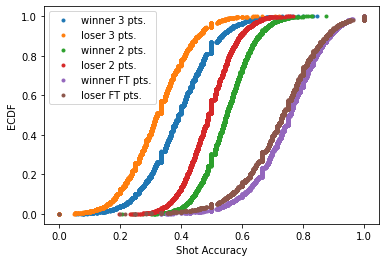

In [46]:
x_3w, y_3w = ecdf(df_new['winner_3_acc'])
x_3l, y_3l = ecdf(df_new['loser_3_acc'])
x_2w, y_2w = ecdf(df_new['winner_2_acc'])
x_2l, y_2l = ecdf(df_new['loser_2_acc'])
x_1w, y_1w = ecdf(df_new['winner_1_acc'])
x_1l, y_1l = ecdf(df_new['loser_1_acc'])
line1, = plt.plot(x_3w, y_3w, marker='.', linestyle='none',label='winner 3 pts.')
line2, = plt.plot(x_3l, y_3l, marker='.', linestyle='none',label='loser 3 pts.')
line3, = plt.plot(x_2w, y_2w, marker='.', linestyle='none',label='winner 2 pts.')
line4, = plt.plot(x_2l, y_2l, marker='.', linestyle='none',label='loser 2 pts.')
line5, = plt.plot(x_1w, y_1w, marker='.', linestyle='none',label='winner FT pts.')
line6, = plt.plot(x_1l, y_1l, marker='.', linestyle='none',label='loser FT pts.')
_ = plt.xlabel('Shot Accuracy')
_ = plt.ylabel('ECDF')
_ = plt.legend(handles=[line1,line2,line3,line4,line5,line6],loc='best')
plt.show()